In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum() # Check the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Categorical_feature=[feature for feature in data.columns if data[feature].dtypes=="O"]
print('No of Categorical feature',len(Categorical_feature))
print(Categorical_feature)

No of Categorical feature 5
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
for feature in Categorical_feature:
    print('The feature {} is having {} categories'.format(feature,len(data[feature].unique())))

The feature Name is having 891 categories
The feature Sex is having 2 categories
The feature Ticket is having 681 categories
The feature Cabin is having 148 categories
The feature Embarked is having 4 categories


# Exploratary Analysis

#### categorical variables


<AxesSubplot:xlabel='Survived', ylabel='count'>

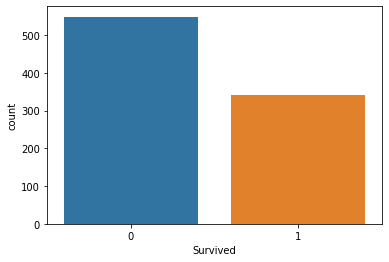

In [9]:
sns.countplot(x="Survived", data=data) # check whether this dataset imbalanced dataset.
                                       # this is not an imbalanced dataset 61% : 39%

<AxesSubplot:xlabel='Survived', ylabel='count'>

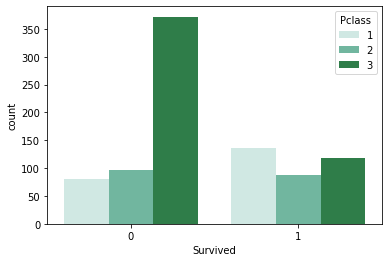

In [10]:
sns.countplot(x="Survived",hue="Pclass",data=data,palette="BuGn")
# people who travelled in 3rd class has heigher death rate

<AxesSubplot:xlabel='Survived', ylabel='count'>

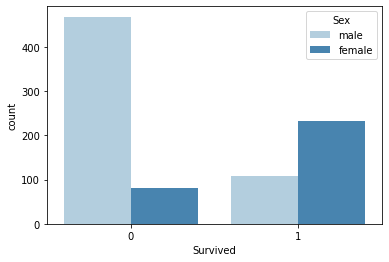

In [11]:
sns.countplot(x="Survived",hue="Sex",data=data,palette="Blues")
# Higher number of males died than females
# Male passengers were higher than female passangers

<AxesSubplot:xlabel='Survived', ylabel='count'>

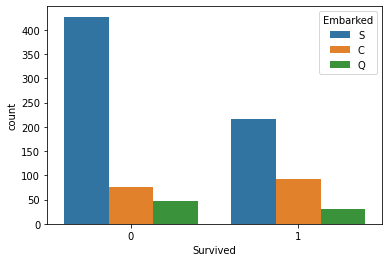

In [12]:
sns.countplot(x="Survived", hue='Embarked',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

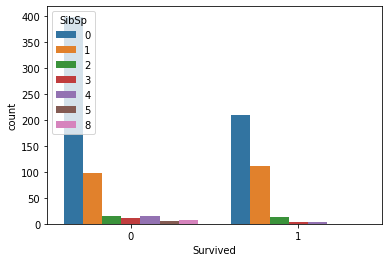

In [13]:
sns.countplot(x="Survived",hue="SibSp",data=data)
# people who do not have siblings and spouse died more than who have SibSp

<AxesSubplot:xlabel='Survived', ylabel='count'>

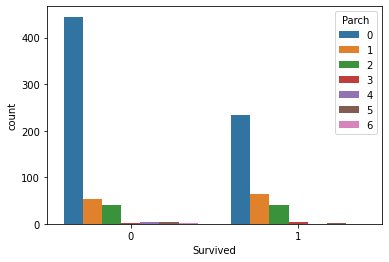

In [14]:
sns.countplot(x="Survived",hue="Parch",data=data)
# This is same as the SbiSp

#### continuous variables

c:\users\shoba\anaconda3\envs\titanic\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

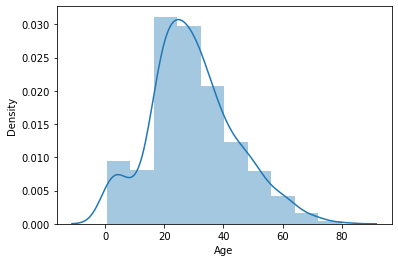

In [15]:
sns.distplot(data['Age'],bins=10)
# Age variable almost follow a normal disribution

<AxesSubplot:xlabel='Survived', ylabel='Age'>

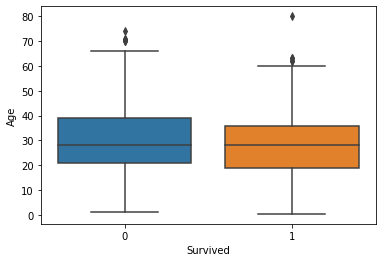

In [16]:
sns.boxplot(x="Survived", y="Age", data=data)
# There is no much difference between two categories (0 and 1)

In [17]:
data.groupby(["Survived"])['Age'].median()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

In [18]:
data.groupby(["Survived"])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

c:\users\shoba\anaconda3\envs\titanic\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

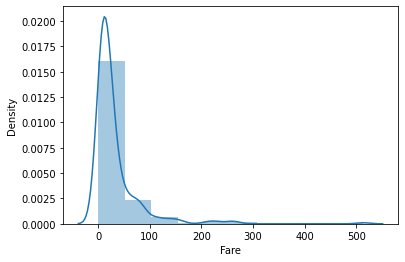

In [19]:
sns.distplot(data["Fare"], bins=10)
# Fare variable is Positively skewed

# Handling missing value


#### Age

In [20]:
# check what is the variable influence on this

In [21]:
data.groupby(["Pclass"])['Age'].median()
# There is a relationship between the "class" and "age"

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

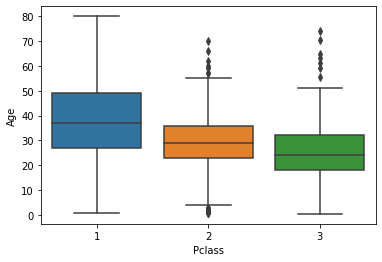

In [22]:
sns.boxplot(x="Pclass",y="Age", data=data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

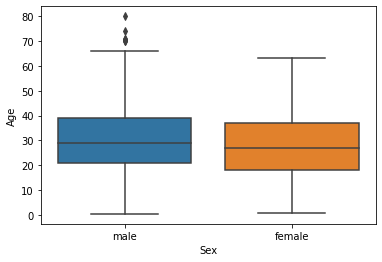

In [23]:
sns.boxplot(x="Sex",y="Age", data=data)
# There is no influence of sex to age

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

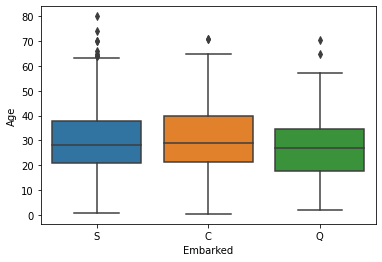

In [24]:
sns.boxplot(x="Embarked",y="Age", data=data)
# three Embarked distinations have almost same behavior on age

In [25]:
def fill_missing_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
data['Age']=data[['Age','Pclass']].apply(fill_missing_age,axis=1)

#### Embarked

In [27]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
data.groupby(['Pclass'])['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [29]:
# In each class there were higher number of passengers from "S", the two missing values of Embarked are filled by "S"

In [30]:
data["Embarked"].fillna("S",inplace=True)

## Feature engineering

#### Title from Name

In [31]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
data['Title']=[i.split('.')[0].split(',')[1].strip() for i in data.Name]

In [33]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
the Countess      1
Jonkheer          1
Ms                1
Capt              1
Lady              1
Sir               1
Mme               1
Don               1
Name: Title, dtype: int64

In [34]:
def name_converted(feature):
    result=''
    if feature in ['Capt','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr','Master']:
        result='Rare'
    elif feature in ['Ms', 'Mlle','the Countess','Lady']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
         result = feature
    return result

In [35]:
data.Title = data.Title.map(name_converted) 

In [36]:
data['Title'].value_counts()

Mr      517
Miss    187
Mrs     126
Rare     61
Name: Title, dtype: int64

#### Family size from Sibsp and Parch

In [37]:
data['Family_size']=data['SibSp']+data['Parch']

#### Fair

In [38]:
#Calculate descriptive statistics.
def calculateSummaryStats(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index = ["skewness"])
    statsDf = pd.DataFrame(pd.concat([skewness, stats], sort = False), columns = [variable.name])
    statsDf = statsDf.reset_index().rename(columns={"index":"summaryStats"})
    return statsDf.round(2)

In [39]:
calculateSummaryStats(data.Fare)

,summaryStats,Fare
0,skewness,4.79
1,count,891.00
2,mean,32.20
3,std,49.69
4,min,0.00
5,25%,7.91
6,50%,14.45
7,75%,31.00
8,max,512.33


In [40]:
# minimum of Fair can not be zero, so, zero replaced by median (mean is affected by outliers)
data['Fare_noZero'] = data['Fare'].replace(0, np.nan)
data['Fare_noZero'].fillna(data['Fare'].median(), inplace = True) 

In [41]:
# log transformation of 'Fare_noZero' to reduce the skewness
data['Fare_noZero_log']=np.log(data['Fare_noZero'])

In [42]:
calculateSummaryStats(data.Fare_noZero_log)
# skewness has reduced to 0.92 from 4.81

,summaryStats,Fare_noZero_log
0,skewness,0.92
1,count,891.00
2,mean,2.94
3,std,0.93
4,min,1.39
5,25%,2.07
6,50%,2.67
7,75%,3.43
8,max,6.24


In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Fare_noZero,Fare_noZero_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.2500,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,71.2833,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,7.9250,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,53.1000,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,8.0500,2.085672


In [44]:
dataset=data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Fare','Fare_noZero'],axis=1)

In [45]:
dataset.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family_size,Fare_noZero_log
0,0,3,male,22.0,S,Mr,1,1.981001
1,1,1,female,38.0,C,Mrs,1,4.266662
2,1,3,female,26.0,S,Miss,0,2.070022
3,1,1,female,35.0,S,Mrs,1,3.972177
4,0,3,male,35.0,S,Mr,0,2.085672


#### create dummy variables for categorical features

In [46]:
df_sex = pd.get_dummies(dataset['Sex'], drop_first = True)
df_Embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)
df_Title = pd.get_dummies(dataset['Title'], drop_first = True)

In [47]:
dataset = pd.concat([dataset, df_sex, df_Embarked, df_Title], axis = 1)

In [48]:
dataset.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family_size,Fare_noZero_log,male,Q,S,Mr,Mrs,Rare
0,0,3,male,22.0,S,Mr,1,1.981001,1,0,1,1,0,0
1,1,1,female,38.0,C,Mrs,1,4.266662,0,0,0,0,1,0
2,1,3,female,26.0,S,Miss,0,2.070022,0,0,1,0,0,0
3,1,1,female,35.0,S,Mrs,1,3.972177,0,0,1,0,1,0
4,0,3,male,35.0,S,Mr,0,2.085672,1,0,1,1,0,0


In [49]:
dataset=dataset.drop(['Sex','Embarked','Title'],axis=1)

In [50]:
dataset.head()

,Survived,Pclass,Age,Family_size,Fare_noZero_log,male,Q,S,Mr,Mrs,Rare
0,0,3,22.0,1,1.981001,1,0,1,1,0,0
1,1,1,38.0,1,4.266662,0,0,0,0,1,0
2,1,3,26.0,0,2.070022,0,0,1,0,0,0
3,1,1,35.0,1,3.972177,0,0,1,0,1,0
4,0,3,35.0,0,2.085672,1,0,1,1,0,0


### examine what kind of model suit for this dataset

c:\users\shoba\anaconda3\envs\titanic\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


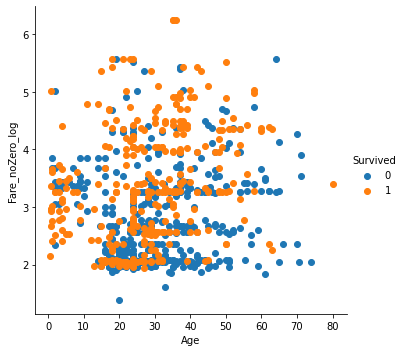

In [51]:
sns.FacetGrid(dataset,hue='Survived',size=5).map(plt.scatter,'Age','Fare_noZero_log').add_legend()

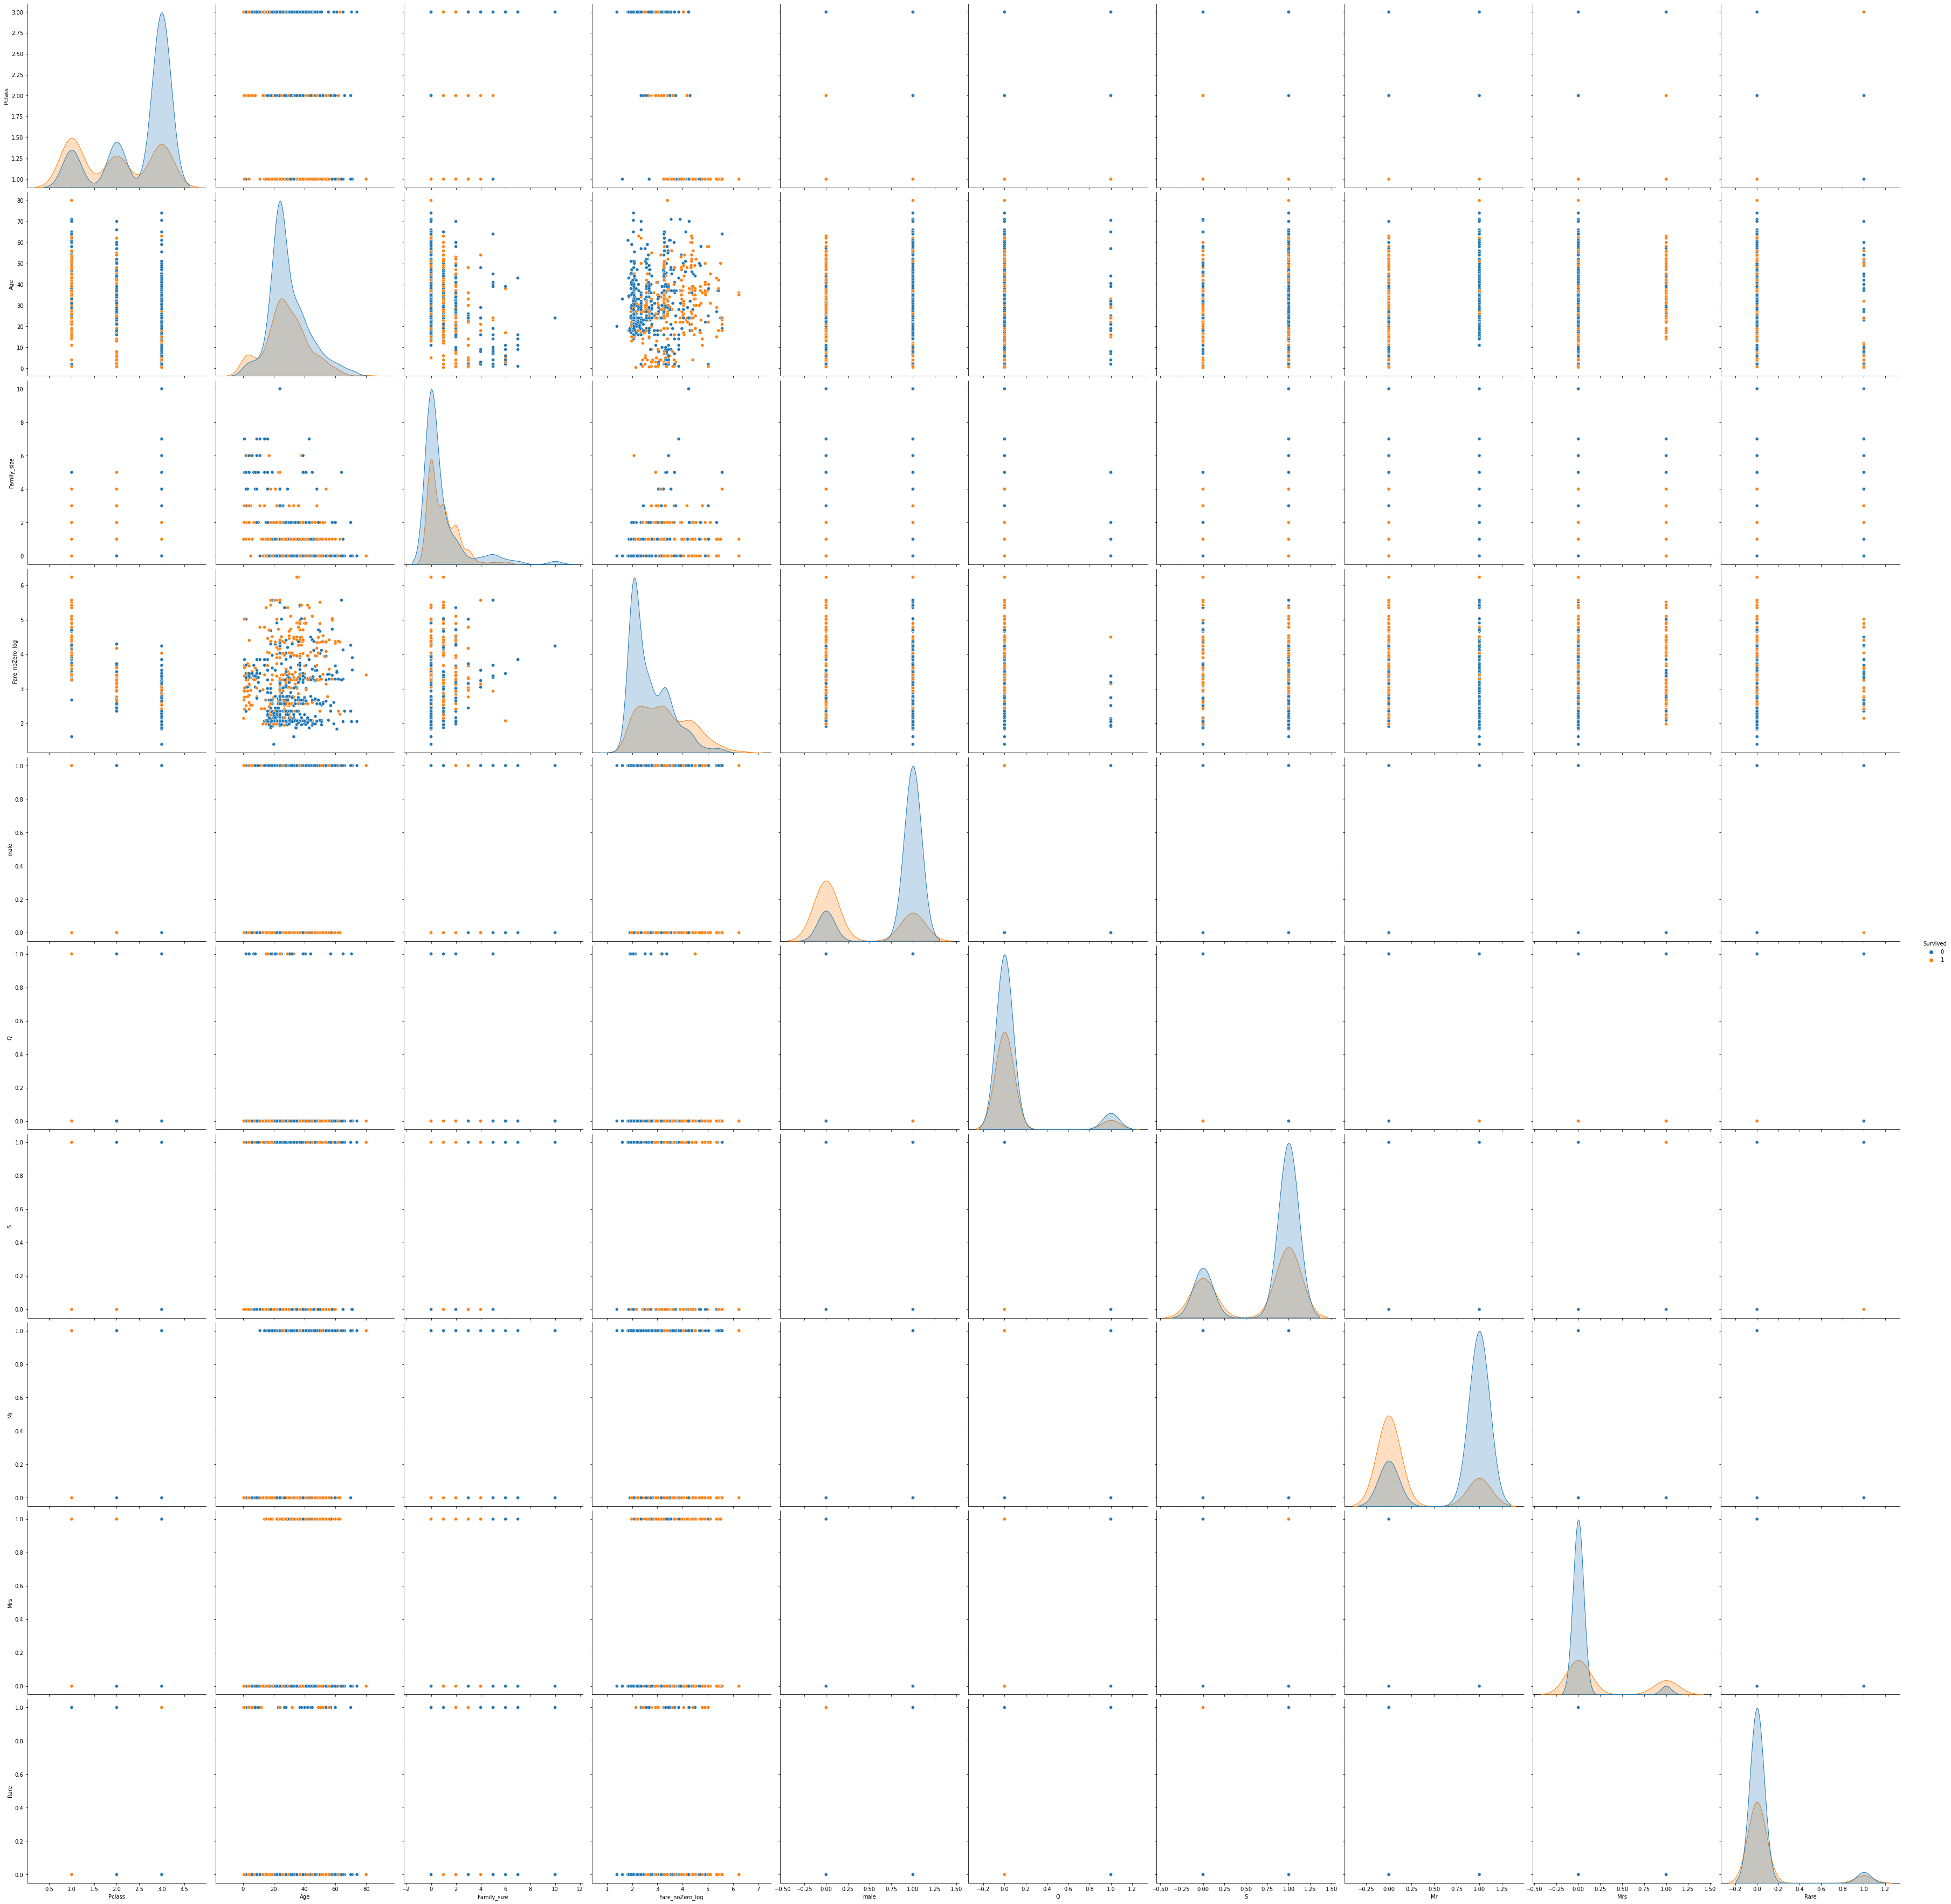

In [52]:
sns.pairplot(dataset, hue = "Survived" , height = 5)

In [53]:
#The above plots show that linearly separable models are not appropriate for the dataset.
# So, I try with Decision tree

In [54]:
x = dataset.iloc[:,1:]
y = dataset['Survived']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Decision tree

In [56]:
DT = DecisionTreeClassifier()
parameter=[{'max_leaf_nodes':list(range(2,50)),
            'min_samples_split':[2,4,6],
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt']}]
DT_random_search=RandomizedSearchCV(estimator=DT,param_distributions= parameter,n_iter=100, cv=10, n_jobs=-1, random_state=42)
DT_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_features': ['auto', 'sqrt'],
                                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                            9, 10, 11, 12, 13,
                                                            14, 15, 16, 17, 18,
                                                            19, 20, 21, 22, 23,
                                                            24, 25, 26, 27, 28,
                                                            29, 30, 31, ...],
                                         'min_samples_split': [2, 4, 6]}],
                   random_state=42)

In [57]:
y_predict = DT_random_search.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test, y_predict)

In [59]:
accuracy

0.746268656716418

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       157
           1       0.74      0.59      0.66       111

    accuracy                           0.75       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.75      0.74       268



In [61]:
print (confusion_matrix(y_test, y_predict))

[[134  23]
 [ 45  66]]


[[134  23]
 [ 45  66]]


c:\users\shoba\anaconda3\envs\titanic\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
c:\users\shoba\anaconda3\envs\titanic\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


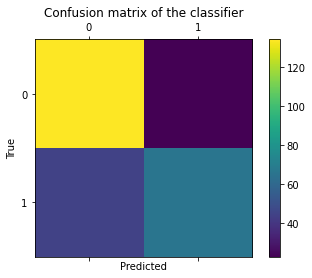

In [65]:
labels = [0,1]
cm = confusion_matrix(y_test, y_predict, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()